In [63]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
import os

In [2]:
df_hour = pd.read_csv('/content/drive/MyDrive/DGdataset/Sample Time Series/hourly/sample_10.csv' , index_col=0)
df_hour['point_timestamp'] = pd.to_datetime(df_hour['point_timestamp'])
df_hour.head()

,point_timestamp,point_value
0,2022-12-08 13:00:00,NaN
1,2022-12-08 14:00:00,11.0
2,2022-12-08 15:00:00,17.0
3,2022-12-08 16:00:00,27.0
4,2022-12-08 17:00:00,17.0


In [3]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   point_timestamp  228 non-null    datetime64[ns]
 1   point_value      227 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [48]:
df_daily = pd.read_csv('/content/drive/MyDrive/DGdataset/Sample Time Series/daily/sample_10.csv' , index_col=0)
df_daily['point_timestamp'] = pd.to_datetime(df_daily['point_timestamp'])
df_daily.head()

,point_timestamp,point_value
0,2021-10-15,NaN
1,2021-10-16,442918.0
2,2021-10-17,111549.0
3,2021-10-18,500495.0
4,2021-10-19,544160.0


In [49]:
df_daily.tail()

,point_timestamp,point_value
470,2023-01-28,27.0
471,2023-01-29,153181.0
472,2023-01-30,541232.0
473,2023-01-31,712411.0
474,2023-02-01,1.0


In [50]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 474
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   point_timestamp  475 non-null    datetime64[ns]
 1   point_value      474 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.1 KB


In [51]:
df_daily.set_index(df_daily['point_timestamp'], inplace=True)
df_daily["interpolated_value"] = df_daily['point_value'].interpolate(limit_direction='both' , method='time')

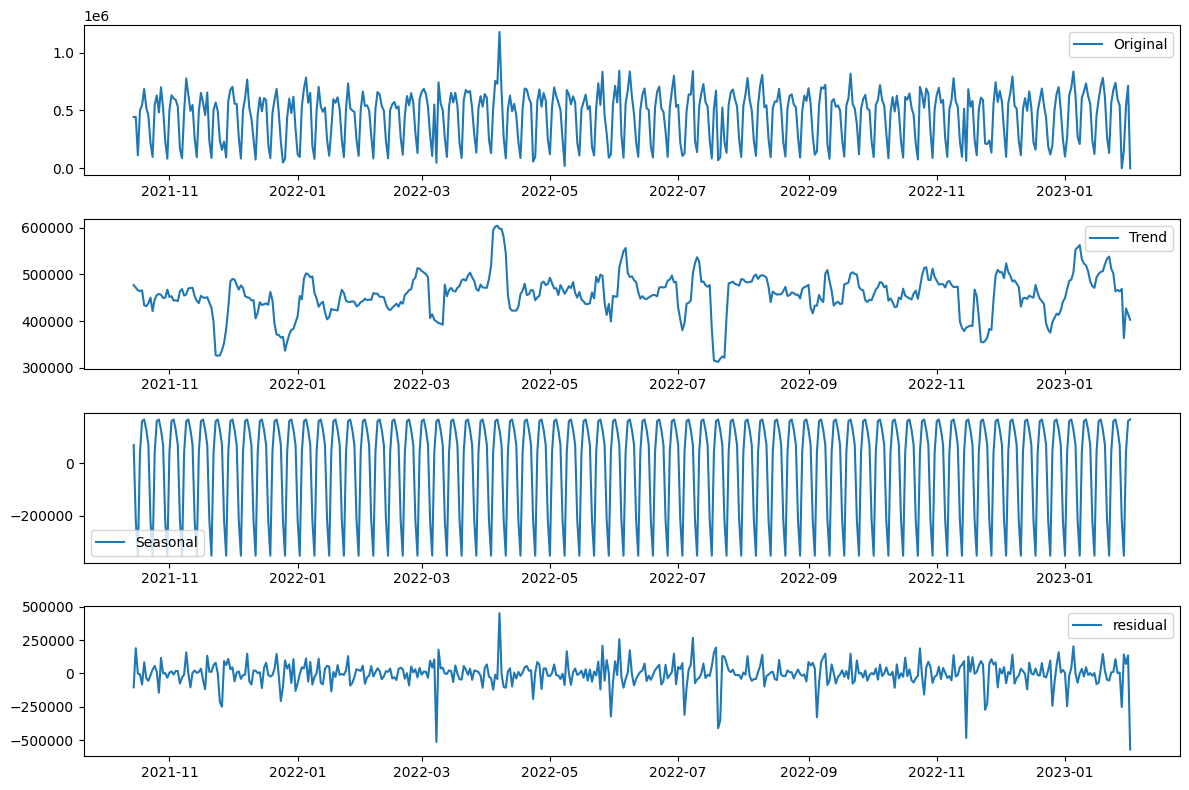

In [60]:
result = seasonal_decompose(df_daily['interpolated_value'], model='additive' ,extrapolate_trend = 'freq')

trend = result.trend
seasonal = result.seasonal
residual = result.resid

df_daily['trend'] = trend
df_daily['seasonal'] = seasonal
df_daily['residual'] = residual

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df_daily['interpolated_value'], label='Original')
plt.legend(loc='best')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(residual, label='residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [61]:
df_daily.head()

,point_timestamp,point_value,interpolated_value,trend,seasonal,residual
point_timestamp,,,,,,
2021-10-15,2021-10-15,NaN,442918.0,477212.704082,70067.282809,-104361.986890
2021-10-16,2021-10-16,442918.0,442918.0,471638.515306,-217466.079962,188745.564655
2021-10-17,2021-10-17,111549.0,111549.0,466064.326531,-352528.686429,-1986.640102
2021-10-18,2021-10-18,500495.0,500495.0,464480.428571,42893.442698,-6878.871269
2021-10-19,2021-10-19,544160.0,544160.0,465944.285714,161550.639051,-83334.924765


In [62]:
df_daily.tail()

,point_timestamp,point_value,interpolated_value,trend,seasonal,residual
point_timestamp,,,,,,
2023-01-28,2023-01-28,27.0,27.0,469036.285714,-217466.079962,-251543.205753
2023-01-29,2023-01-29,153181.0,153181.0,363565.714286,-352528.686429,142143.972143
2023-01-30,2023-01-30,541232.0,541232.0,427233.974490,42893.442698,71104.582813
2023-01-31,2023-01-31,712411.0,712411.0,415084.336735,161550.639051,135776.024214
2023-02-01,2023-02-01,1.0,1.0,402934.698980,167495.606413,-570429.305393


In [24]:
df_week = pd.read_csv('/content/drive/MyDrive/DGdataset/Sample Time Series/weekly/sample_1.csv' , index_col=0)
df_week['point_timestamp'] = pd.to_datetime(df_week['point_timestamp'])
df_week.head()

,point_timestamp,point_value
0,2021-01-11,53423552.0
1,2021-01-18,56541361.0
2,2021-01-25,55957540.0
3,2021-02-01,56278317.0
4,2021-02-08,50410674.0


In [25]:
df_month = pd.read_csv('/content/drive/MyDrive/DGdataset/Sample Time Series/monthly/sample_1.csv' , index_col=0)
df_month['point_timestamp'] = pd.to_datetime(df_month['point_timestamp'])
df_month.head()

,point_timestamp,point_value
0,2018-01-01,0.000364
1,2018-02-01,0.000313
2,2018-03-01,0.000079
3,2018-04-01,0.000044
4,2018-05-01,0.000000


In [138]:
MAX_iter = 10
frames = []
for i in range(1, MAX_iter):
  path = '/content/drive/MyDrive/DGdataset/Sample Time Series/daily/sample_{}.csv'.format(i)
  df_daily = pd.read_csv(path , index_col=0)
  frames.append(df_daily)


combined_df_daily = pd.concat(frames)
combined_df_daily['point_timestamp'] = pd.to_datetime(combined_df_daily['point_timestamp'])
combined_df_daily.head()

,point_timestamp,point_value
0,2019-07-14,6.0
1,2019-07-15,7.0
2,2019-07-16,6.0
3,2019-07-17,6.0
4,2019-07-18,7.0


In [139]:
combined_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967 entries, 0 to 95
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   point_timestamp  2967 non-null   datetime64[ns]
 1   point_value      2871 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 69.5 KB


Handle missing values

In [140]:
combined_df_daily['point_value'].isnull().sum()

96

In [141]:
combined_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967 entries, 0 to 95
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   point_timestamp  2967 non-null   datetime64[ns]
 1   point_value      2871 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 69.5 KB


In [142]:
combined_df_daily.set_index(combined_df_daily['point_timestamp'], inplace=True)
combined_df_daily["interpolated_value"] = combined_df_daily['point_value'].interpolate(method='time')

In [143]:
combined_df_daily = combined_df_daily.sort_index()

In [144]:
years = sorted(combined_df_daily.index.year.unique())

fig = px.line(combined_df_daily, x='point_timestamp', y='point_value',category_orders={'x': years})

fig.update_layout(updatemenus=[{'buttons': [{'method': 'relayout',
                                            'label': str(year),
                                            'args': [{'xaxis.range': [str(year) + '-01-01', str(year) + '-12-31']}]}
                                           for year in years],
                               'showactive': True,
                               'x': 0.01,
                               'xanchor': 'left',
                               'y': 1.15,
                               'yanchor': 'top'}])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [112]:
years = sorted(combined_df_daily.index.year.unique())

fig = px.line(combined_df_daily, x=combined_df_daily.index, y='interpolated_value',category_orders={'x': years})

fig.update_layout(updatemenus=[{'buttons': [{'method': 'relayout',
                                            'label': str(year),
                                            'args': [{'xaxis.range': [str(year) + '-01-01', str(year) + '-12-31']}]}
                                           for year in years],
                               'showactive': True,
                               'x': 0.01,
                               'xanchor': 'left',
                               'y': 1.15,
                               'yanchor': 'top'}])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# **Data Generation for Daily data for classification Model**

In [104]:
folder_path = "/content/drive/MyDrive/DGdataset/Sample Time Series/daily/"
frames = []

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path , index_col = 0)
        frames.append(df)

combined_df_daily = pd.concat(frames)
column_mapping = {
    'point_timestamp': 'date',
    'point_value': 'value',
}

combined_df_daily.rename(columns=column_mapping, inplace=True)
combined_df_daily['date'] = pd.to_datetime(combined_df_daily['date'])
combined_df_daily.set_index(combined_df_daily['date'], inplace=True)
combined_df_daily.sort_index(inplace=True)
combined_df_daily.rename_axis('index',inplace=True)
combined_df_daily.head()

,date,value
index,,
2019-07-14,2019-07-14,6.0
2019-07-15,2019-07-15,7.0
2019-07-16,2019-07-16,6.0
2019-07-17,2019-07-17,6.0
2019-07-18,2019-07-18,7.0


In [105]:
combined_df_daily.tail()

,date,value
index,,
2023-01-28,2023-01-28,27.0
2023-01-29,2023-01-29,153181.0
2023-01-30,2023-01-30,541232.0
2023-01-31,2023-01-31,712411.0
2023-02-01,2023-02-01,1.0


In [106]:
combined_df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3442 entries, 2019-07-14 to 2023-02-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3442 non-null   datetime64[ns]
 1   value   3345 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 80.7 KB


In [107]:
combined_df_daily['value'].isnull().sum()

97

In [108]:
combined_df_daily['date'].is_unique

False

In [111]:
if combined_df_daily['date'].is_unique:
    print("All values are unique.")
else:
    # Calculate the average for duplicate values
    combined_df_daily = combined_df_daily.groupby('date').mean().reset_index()
    print("Duplicates were found and removed.")

Duplicates were found and removed.


In [112]:
combined_df_daily['date'].is_unique

True

In [113]:
combined_df_daily.head()

,date,value
0,2019-07-14,6.0
1,2019-07-15,7.0
2,2019-07-16,6.0
3,2019-07-17,6.0
4,2019-07-18,7.0


In [114]:
combined_df_daily.tail()

,date,value
1294,2023-01-28,27.0
1295,2023-01-29,153181.0
1296,2023-01-30,541232.0
1297,2023-01-31,712411.0
1298,2023-02-01,1.0
